In [2]:
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats
import numpy as np

In [33]:
results_single = pickle.load(open('results.pkl', 'rb'))
results_multi = pickle.load(open('results_multi.pkl', 'rb'))

In [60]:
test_dict = {
    "test_basic_medium_density" : "Train Environment",
    "test_maze0_medium_density" : "Simple Maze",
    "test_maze1_medium_density" : "Hard Maze",
}

agent_dict = {
    "agent2_3" : "Baseline",
    "agent1_3" : "Width 128",
    "agent3_3" : "Width 512",
    "agent4_3" : "Depth 4",
    "agent5_3" : "CNN",
    "agent2_10" : "Starting Length 10",
}

agent_colors = {
    "agent1_3" : "tab:orange",
    "agent2_3" : "tab:blue",
    "agent3_3" : "tab:green",
    "agent4_3" : "tab:red",
    "agent5_3" : "tab:purple",
    "agent2_10" : "tab:brown",
}

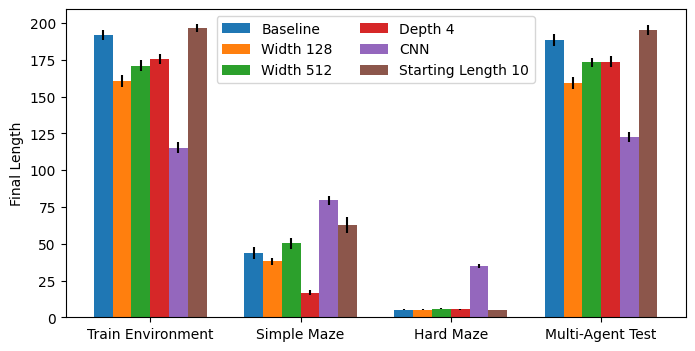

In [62]:
pos = 0
bar_width = 0.2

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

first_test = True

xticklocs = []

for test in results_single:
    avgloc = 0

    for method in agent_dict:
        mean = np.mean(results_single[test][method])
        stderr = stats.sem(results_single[test][method])
        if first_test:
            ax.bar(pos, mean, bar_width, yerr = stderr, color = agent_colors[method], label=agent_dict[method])
        else:
            ax.bar(pos, mean, bar_width, yerr = stderr, color = agent_colors[method])

        avgloc += pos
        pos += bar_width

    pos += 0.4
    first_test = False

    xticklocs.append(avgloc / len(agent_dict))

test = "test_basic_medium_density"
avgloc = 0

for method in agent_dict:
    mean = np.mean(np.array(results_multi[test][method]).max(axis = 1))
    stderr = stats.sem(np.array(results_multi[test][method]).max(axis = 1))
    ax.bar(pos, mean, bar_width, yerr = stderr, color = agent_colors[method])

    avgloc += pos
    pos += bar_width

pos += 0.4

xticklocs.append(avgloc / len(agent_dict))

# Adding labels and title
ax.set_ylabel('Final Length')
ax.set_xticks(xticklocs)
ax.set_xticklabels([test_dict[key] for key in results_single]+["Multi-Agent Test"])
ax.legend(ncols = 2)

plt.savefig('results.png', dpi = 300)

# Display the plot
plt.show()

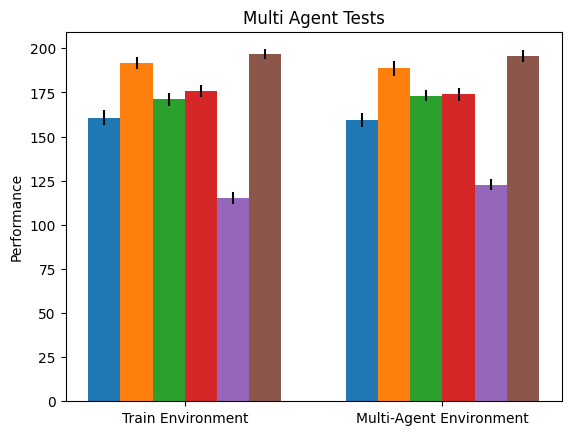

In [47]:
fig, ax = plt.subplots()
xticklocs = []

pos = 0
bar_width = 0.2

test = "test_basic_medium_density"

avgloc = 0

for method in agent_dict:
    mean = np.mean(np.array(results_single[test][method]).flatten())
    stderr = stats.sem(np.array(results_single[test][method]).flatten())
    ax.bar(pos, mean, bar_width, yerr = stderr, color = agent_colors[method], label=agent_dict[method])

    avgloc += pos
    pos += bar_width

pos += 0.4

xticklocs.append(avgloc / len(agent_dict))


avgloc = 0

for method in agent_dict:
    mean = np.mean(np.array(results_multi[test][method]).max(axis = 1))
    stderr = stats.sem(np.array(results_multi[test][method]).max(axis = 1))
    ax.bar(pos, mean, bar_width, yerr = stderr, color = agent_colors[method])

    avgloc += pos
    pos += bar_width

pos += 0.4

xticklocs.append(avgloc / len(agent_dict))

# Adding labels and title
ax.set_ylabel('Performance')
ax.set_title('Multi Agent Tests')
ax.set_xticks(xticklocs)
ax.set_xticklabels(["Train Environment", "Multi-Agent Environment"])
#ax.legend(ncols = 2)

# Display the plot
plt.show()